In [1]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing files needed
file1 = "../Resources/Mouse_metadata.csv"
mouse = pd.read_csv(file1)
# Add second file
file2 = "../Resources/Study_results.csv"
result = pd.read_csv(file2)

In [3]:
# Create a dataframe for the study results
result_df = pd.DataFrame(result)
result_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [23]:
# Cleaning the dataframe removing only the duplicates
result_clean_df = pd.DataFrame(result_df.drop_duplicates(subset = ['Mouse ID','Timepoint']))
result_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Creating a new dataframe
mouse_df = pd.DataFrame(mouse)
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
# Rename column for readability
mouse_df = mouse_df.rename(columns = {"Age_months":"Age (Months)"})

# Checking for any null values
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age (Months)  249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [7]:
# Checking for any odd values
check_mouse_df = mouse_df.sort_values(["Mouse ID"], ascending = False)
check_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g)
248,z969,Naftisol,Male,9,30
247,z795,Naftisol,Female,13,29
246,z581,Infubinol,Female,24,25
8,z578,Ramicane,Male,11,16
245,z435,Propriva,Female,12,26


In [8]:
# Identifying any duplicates
mouse_df["Mouse ID"].value_counts()

x402    1
e584    1
y260    1
b742    1
k603    1
       ..
t724    1
j984    1
q610    1
l264    1
c758    1
Name: Mouse ID, Length: 249, dtype: int64

In [9]:
# Combining the two data frames together
combined_table_df = pd.merge(mouse_df, result_clean_df, on = "Mouse ID")
combined_table_df.head()

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Summary table by drug regimen

# Group the dataframe by the drug regimen
drugs = combined_table_df.groupby("Drug Regimen")

#Creating a summary table with the aggregate function
drug_summ = drugs["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
drug_summ

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


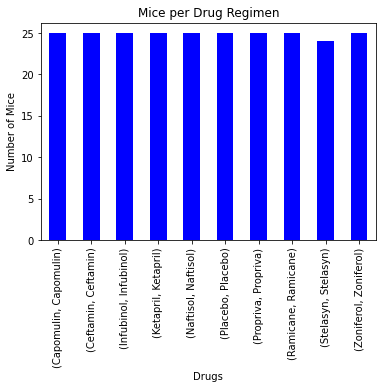

In [21]:
# Create a bar plot

# Creating the axis
x_axis = np.arange(0,len(drug_summ))

# The amount of subjects for each drug regiment
drug_count = drugs["Drug Regimen"].value_counts()

# bar plot with pandas
drug_plot = drug_count.plot(kind = 'bar', color = 'blue')

drug_plot.set_xlabel("Drugs")
drug_plot.set_ylabel("Number of Mice")
plt.title("Mice per Drug Regimen")
plt.show()

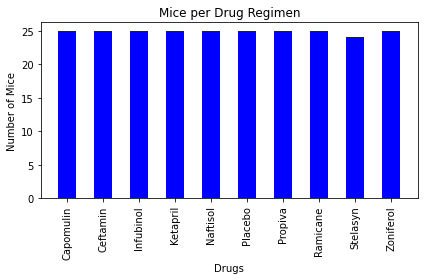

In [22]:
# bar plot using matplotlib

plt.bar(x_axis, drug_count, width =.5, color = 'blue', alpha = 1 ,align = 'center')

# Setting the tick locations
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo',
                           'Propiva','Ramicane','Stelasyn','Zoniferol'],
          rotation = 'vertical')
# Labels for the axis
plt.xlabel("Drugs")
plt.ylabel("Number of Mice")
plt.title("Mice per Drug Regimen")

# Shows the plot
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Mice Gender')

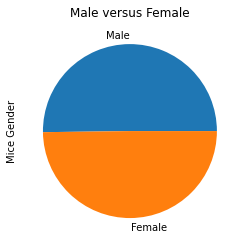

In [13]:
# Creating a pie chart based on the sex of the mice
# This uses pandas plot
sex_count = mouse_df['Sex'].value_counts()
sex_plot = sex_count.plot(kind = 'pie', y = 'Sex', title = 'Male versus Female')

sex_plot.set_ylabel("Mice Gender")


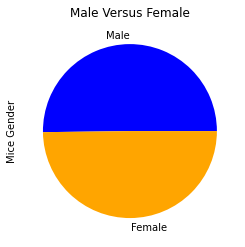

In [14]:
# This uses matplotlib to show the plot
label = ['Male', 'Female']
sizes = sex_count
colors = ['blue','orange']

plt.pie(sizes, labels=label, colors=colors)

plt.title("Male Versus Female")
plt.ylabel("Mice Gender")
plt.show()

In [24]:
# Cleans up the table to only have the latest timepoint
combined_table_clean_df = pd.DataFrame(combined_table_df.drop_duplicates(subset = ['Mouse ID'], keep = 'last'))

# Choosing only the 4 drug regimen values
# Capomulin, Ramicane, Infubinol, Ceftamin
reduced_drug_df = combined_table_clean_df.loc[(combined_table_clean_df["Drug Regimen"] == 'Capomulin') |
                                              (combined_table_clean_df["Drug Regimen"] == 'Ramicane') |
                                              (combined_table_clean_df["Drug Regimen"] == 'Infubinol') |
                                              (combined_table_clean_df["Drug Regimen"] == 'Ceftamin')]
reduced_drug_df.head()

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [38]:
ramicane_df = reduced_drug_df.loc[(reduced_drug_df["Drug Regimen"] == 'Ramicane')]
ram_med = ramicane_df["Tumor Volume (mm3)"].median()

In [37]:
# Creates a list with the drug names
drug_name = []

# Loops through the drug regimen column and finds unique names
for drug in reduced_drug_df["Drug Regimen"]:
    if drug not in drug_name:
        drug_name.append(drug)
        
print(drug_name)

['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']


In [60]:
# Funtion finds the IQR for a given list and median of the list.
def IQR(x,y):
    lower = []
    upper = []
    quart = []

    for vol in x:
        if vol > y:
            upper.append(vol)
        elif vol < y:
            lower.append(vol)

    low = pd.Series(lower)
    up = pd.Series(upper)
    
    lowmed = low.median()
    highmed = up.median()
    
    quart = pd.DataFrame({"Upper Bound": [highmed],
                          "Median": [y],
                         "Lower Bound": [lowmed]})
    
    return quart

In [61]:
# Finding the quartile ranges using the function

Ramicane_bounds = IQR(ramicane_df["Tumor Volume (mm3)"],ram_med)
Ramicane_bounds

,Upper Bound,Median,Lower Bound
0,40.66336,36.561652,31.327902


In [16]:
## Double Checking values
result_df["Mouse ID"].value_counts()

find = result_df.loc[result_df['Mouse ID'] == 'g989']
find.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0


In [17]:
## Check to see if it worked
find2 = result_clean_df.loc[result_df['Mouse ID'] == 'g989']
find2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
329,g989,5,48.786801,0
620,g989,10,51.745156,0
815,g989,15,51.325852,1
950,g989,20,55.326122,1


In [18]:
## Practicing groupby statements
study_result = result_clean_df.groupby("Mouse ID")
study_result_df = pd.DataFrame(study_result["Tumor Volume (mm3)"].value_counts())
study_result_df.head()

Tumor Volume (mm3)
Mouse ID Tumor Volume (mm3)                    
a203     45.000000                            1
         48.508468                            1
         51.852437                            1
         52.777870                            1
         55.173336                            1

In [19]:
## Checks first attempt
# Summary table by drug regimen

# Rename column for readability
mouse_df = mouse_df.rename(columns = {"Age_months":"Age(Months)"})

# Group the dataframe by the drug regimen
drugs = mouse_df.groupby("Drug Regimen")

# Find the summary statistics
# Mean
drug_mean = drugs["Weight (g)"].mean()
#Median
drug_median = drugs["Weight (g)"].median()
# Variance
drug_variance = drugs["Weight (g)"].var()
# Standard Deviation
drug_std = drugs["Weight (g)"].std()
# Standard error
drug_sem = drugs["Weight (g)"].sem()

In [20]:
# Merging the summary statistics together
summary_df = pd.merge(drug_mean,drug_median, on = 'Drug Regimen')

#Rename columns for clarity and readability
summary_df = summary_df.rename(columns = {"Weight (g)_x":"Weight (g) Mean", "Weight (g)_y":"Weight (g) Median"})

# Repeatting the process for the rest of the statistics
# (Variance)
summary_df = pd.merge(summary_df,drug_variance, on = 'Drug Regimen')

summary_df = summary_df.rename(columns = {"Weight (g)":"Weight (g) Variance"})

# (Standard Deviation)
summary_df = pd.merge(summary_df,drug_std, on = 'Drug Regimen')

summary_df = summary_df.rename(columns = {"Weight (g)":"Weight (g) STD"})

# (SEM)
summary_df = pd.merge(summary_df,drug_sem, on = 'Drug Regimen')

summary_df = summary_df.rename(columns = {"Weight (g)":"Weight (g) SEM"})

summary_df

,Weight (g) Mean,Weight (g) Median,Weight (g) Variance,Weight (g) STD,Weight (g) SEM
Drug Regimen,,,,,
Capomulin,20.120,21,8.193333,2.862400,0.572480
Ceftamin,27.400,28,2.833333,1.683251,0.336650
Infubinol,27.320,27,4.726667,2.174090,0.434818
Ketapril,28.080,29,3.493333,1.869046,0.373809
Naftisol,27.240,27,2.356667,1.535144,0.307029
Placebo,28.040,28,3.790000,1.946792,0.389358
Propriva,27.240,27,2.940000,1.714643,0.342929
Ramicane,20.000,19,11.250000,3.354102,0.670820
Stelasyn,27.875,28,2.809783,1.676241,0.342161


In [43]:
## Test code for function

ramicane_lower = []
ramicane_upper = []

for vol in ramicane_df["Tumor Volume (mm3)"]:
    if vol > ram_med:
        ramicane_upper.append(vol)
    elif vol < ram_med:
        ramicane_lower.append(vol)
        
rlow = pd.Series(ramicane_lower)
rlow.median()

31.327902299999998